# Data-Analysis: 911-Calls

# Project Preview

<img src="../assets/911-pic.jpg" alt="EMERGENCY_TYPE-Pic">

## Data StoryTelling

StoryTelling about the Data

## Data Questions

- Which Town got the most 911-Calls
- ...

## Imports

In [1143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

from pandas import Series, DataFrame


np.set_printoptions(suppress=True)

sns.set(rc={"figure.figsize": (12, 7), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

# Data overview

In [1144]:
raw_data_df = pd.read_csv("../data/911.csv")
df = raw_data_df.copy()

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [1145]:
# columns
LAT = "lat"
LNG = "lng"
DESC = "desc"
ZIP = "zip"
EMERGENCY_TYPE = "emergencyType"
TIMESTAMP = "timeStamp"
TOWN = "town"
ADDRESS = "addr"
C = "count"

# added columns
YEAR = "year"
MONTH = "month"
DAY_OF_WEEK = "dayOfWeek"
HOUR_OF_DAY = "hourOfDay"

In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [1147]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [1148]:
df.describe(include="O")

,desc,title,timeStamp,twp,addr
count,99492,99492,99492,99449,98973
unique,99455,110,72577,68,21914
top,GREEN ST & E BASIN ST; NORRISTOWN; Station 30...,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD
freq,4,23066,8,8443,938


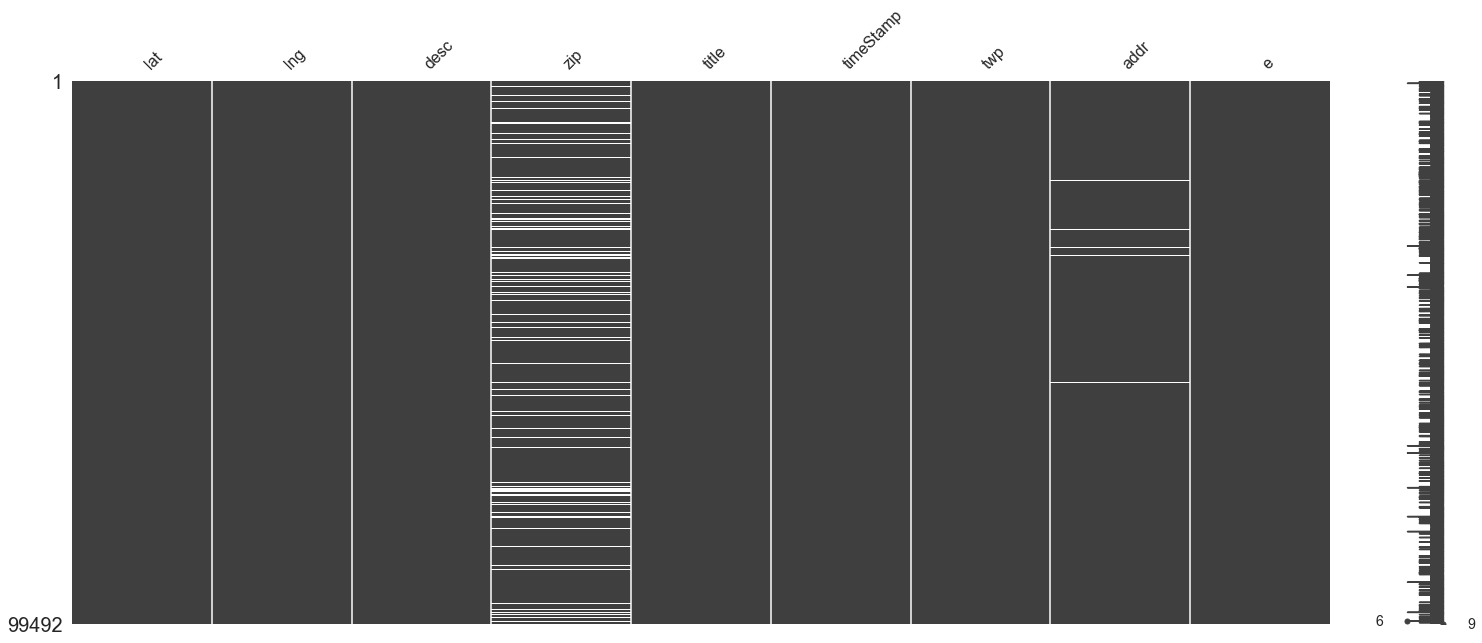

In [1149]:
msno.matrix(df);

# Helper Functions and Constants

In [1150]:
# pass

# Data Cleaning & Preprocessing - Plus - Exploring the Data

## Drop and renaming columns

In [1151]:
df.drop(columns=[LAT, LNG], inplace=True)
df.rename(columns={"e": C, "twp": TOWN, "title": EMERGENCY_TYPE}, inplace=True)
df

,desc,zip,emergencyType,timeStamp,town,addr,count
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...
99487,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


## DESC

In [1152]:
display(
    df[DESC].unique(),
    df[DESC].nunique()
)

array(['REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;',
       'BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;',
       'HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;', ...,
       'CHESTNUT ST & WALNUT ST;  NORRISTOWN; Station 308A; 2016-08-24 @ 11:07:31;',
       'WELSH RD & WEBSTER LN;  HORSHAM; Station 352; 2016-08-24 @ 11:13:19;',
       'MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08-24 @ 11:15:50;'],
      dtype=object)

99455

In [1153]:
df[DESC].unique()[10:20]

array(['RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 @ 17:33:50;',
       'BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ 16:32:10;',
       'BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND; 2015-12-10 @ 17:15:49;',
       'OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-10 @ 17:12:47;',
       'SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER MERION; 2015-12-10 @ 17:09:49;',
       'STUMP RD & WITCHWOOD DR; MONTGOMERY; 2015-12-10 @ 17:31:00;',
       'SUSQUEHANNA AVE & W MAIN ST;  LANSDALE; Station 345B; 2015-12-10 @ 17:42:44;',
       'CHARLOTTE ST & MILES RD;  NEW HANOVER; Station 332; 2015-12-10 @ 17:41:54;',
       'PENN ST & ARCH ST;  NORRISTOWN; Station 308A; 2015-12-10 @ 17:43:29;',
       'COUNTY LINE RD & WILLOW DR; HORSHAM; 2015-12-10 @ 17:45:23;'],
      dtype=object)

In [1154]:
Series(df[DESC].unique()).str.contains("DEAD").sum()

1390

Cannot find any useful data pattern. Drop this in the end

## ZIP

In [1155]:
df[ZIP].isna().sum()

12855

In [1156]:
display(
    df[ZIP].unique(),
    df[ZIP].nunique()
)

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 18103., 17752., 19111., 18927., 19435., 18951.,
       19472., 19503., 19126., 19505., 19423., 19138., 36107., 18036.,
       19116., 19139., 19129., 19115., 19355., 77316., 19457., 19082.,
       19127.])

104

In [1157]:
df.loc[:, [TOWN, ZIP]].value_counts()

town              zip    
NORRISTOWN        19401.0    5561
POTTSTOWN         19464.0    4030
UPPER MERION      19406.0    3119
LOWER PROVIDENCE  19403.0    2511
LIMERICK          19468.0    1875
                             ... 
MONTGOMERY        19403.0       1
                  19401.0       1
                  19034.0       1
                  18073.0       1
WORCESTER         19490.0       1
Length: 364, dtype: int64

In [1158]:
df.loc[df[TOWN] == "NEW HANOVER", [TOWN, ZIP]].value_counts()

town         zip    
NEW HANOVER  19525.0    481
             18074.0    136
             19464.0     69
             19435.0     35
             18054.0     10
             19472.0      4
             19492.0      4
             19504.0      3
             19473.0      2
dtype: int64

We can interpolate the ZIP by the Town-Mode

In [1159]:
# ascending, because the .to_dict() overrides the already setted key and so the last one is the taken value
zip_map = df[[TOWN, ZIP]].value_counts(ascending=True).reset_index(ZIP)[ZIP].to_dict()
zip_map.get("NEW HANOVER")

19525.0

In [1160]:
is_zip_na = df[ZIP].isna()
df.loc[is_zip_na, ZIP] = df.loc[is_zip_na, TOWN].map(zip_map)
df[ZIP].isna().sum()

228

## EMERGENCY_TYPE

In [1161]:
df[EMERGENCY_TYPE]

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: emergencyType, Length: 99492, dtype: object

In [1162]:
display(
    df[EMERGENCY_TYPE].unique(),
    df[EMERGENCY_TYPE].nunique()
)

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

110

Note: EMS, Fire and Traffic

In [1163]:
df[EMERGENCY_TYPE] = df[EMERGENCY_TYPE].apply(
    lambda EMERGENCY_TYPE: 
        "EMS" if "EMS" in EMERGENCY_TYPE else 
        "FIRE" if "Fire" in EMERGENCY_TYPE else 
        "TRAFFIC" if "Traffic" in EMERGENCY_TYPE else np.nan
)

df[EMERGENCY_TYPE].value_counts()

EMS        48879
TRAFFIC    35695
FIRE       14918
Name: emergencyType, dtype: int64

## TimeStamp

In [1164]:
df

,desc,zip,emergencyType,timeStamp,town,addr,count
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,FIRE,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19464.0,EMS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...
99487,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,TRAFFIC,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,TRAFFIC,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [1165]:
df[TIMESTAMP]

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [1166]:
df[TIMESTAMP] = pd.to_datetime(df[TIMESTAMP])
df[TIMESTAMP]

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [1167]:
df[YEAR] = df[TIMESTAMP].dt.year
df[MONTH] = df[TIMESTAMP].dt.month_name()
df[DAY_OF_WEEK] = df[TIMESTAMP].dt.day_name()
df[HOUR_OF_DAY] = df[TIMESTAMP].dt.hour
df[[TIMESTAMP, YEAR, MONTH, DAY_OF_WEEK, HOUR_OF_DAY]]

,timeStamp,year,month,dayOfWeek,hourOfDay
0,2015-12-10 17:40:00,2015,December,Thursday,17
1,2015-12-10 17:40:00,2015,December,Thursday,17
2,2015-12-10 17:40:00,2015,December,Thursday,17
3,2015-12-10 17:40:01,2015,December,Thursday,17
4,2015-12-10 17:40:01,2015,December,Thursday,17
...,...,...,...,...,...
99487,2016-08-24 11:06:00,2016,August,Wednesday,11
99488,2016-08-24 11:07:02,2016,August,Wednesday,11
99489,2016-08-24 11:12:00,2016,August,Wednesday,11
99490,2016-08-24 11:17:01,2016,August,Wednesday,11


In [1168]:
HOUR_OF_DAY_ORDER = np.arange(0, 24)
DAY_OF_WEEK_ORDER = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
MONTH_ORDER = ["January", "February", "March", "April", "May", "June", "July", "August", "December"] # "September", "October", "November" are not in this dataset

df[HOUR_OF_DAY] = df[HOUR_OF_DAY].astype("category").cat.set_categories(HOUR_OF_DAY_ORDER, ordered=True)
df[DAY_OF_WEEK] = df[DAY_OF_WEEK].astype("category").cat.set_categories(DAY_OF_WEEK_ORDER, ordered=True)
df[MONTH] = df[MONTH].astype("category").cat.set_categories(MONTH_ORDER, ordered=True)


## 

## Town

In [1169]:
df[TOWN].isna().sum()

43

In [1170]:
display(
    df[TOWN].unique(),
    df[TOWN].nunique(),
)

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN',
       'LOWER POTTSGROVE', 'LANSDALE', 'HORSHAM', 'SKIPPACK',
       'LOWER SALFORD', 'PLYMOUTH', 'MONTGOMERY', 'UPPER MORELAND',
       'CHELTENHAM', 'UPPER MERION', 'WHITEMARSH', 'UPPER GWYNEDD',
       'LOWER PROVIDENCE', 'UPPER DUBLIN', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'LOWER MERION', 'LIMERICK',
       'TOWAMENCIN', 'DOUGLASS', 'POTTSTOWN', 'BRIDGEPORT', 'AMBLER',
       'CHESTER COUNTY', 'UPPER HANOVER', 'SPRINGFIELD', 'ROCKLEDGE',
       'ABINGTON', 'WEST NORRITON', 'ROYERSFORD', 'UPPER SALFORD',
       'LOWER MORELAND', 'CONSHOHOCKEN', 'PENNSBURG', 'TELFORD',
       'EAST NORRITON', 'UPPER FREDERICK', 'UPPER PROVIDENCE', 'SALFORD',
       'HATFIELD BORO', 'LEHIGH COUNTY', 'LOWER GWYNEDD', 'MARLBOROUGH',
       'BRYN ATHYN', 'HATBORO', 'WORCESTER', 'COLLEGEVILLE',
       'SCHWENKSVILLE', 'PERKIOMEN', 'SOUDERTON', 'UPPER POTTSGROVE',
       'LOWER FREDERICK', nan, 'BUCKS COUNTY', 'RED 

68

In [1171]:
df.loc[df[TOWN].isna(), [TOWN, ZIP]]

,town,zip
482,NaN,NaN
1648,NaN,19040.0
1834,NaN,NaN
5488,NaN,18976.0
7323,NaN,19401.0
7324,NaN,19401.0
8367,NaN,17752.0
10168,NaN,NaN
29057,NaN,NaN
30259,NaN,NaN


In [1172]:
town_map = df[[ZIP, TOWN]].value_counts(ascending=True).reset_index(TOWN)[TOWN].to_dict()
town_map.get(19040.0)

'UPPER MORELAND'

In [1173]:
is_town_na = (df[ZIP].notna() & df[TOWN].isna())
df.loc[is_town_na, TOWN] = df.loc[is_town_na, ZIP].map(town_map)
df.loc[df[TOWN].isna(), [TOWN, ZIP]]

,town,zip
482,NaN,NaN
1834,NaN,NaN
8367,NaN,17752.0
10168,NaN,NaN
29057,NaN,NaN
30259,NaN,NaN
35585,NaN,NaN
36553,NaN,NaN
37052,NaN,NaN
37351,NaN,NaN


In [1174]:
df.loc[df[TOWN].isna(), DESC]

482               ; ; 2015-12-11 @ 21:21:14-Station:STA67;
1834     CHURCH RD;  ; Station 322; 2015-12-15 @ 11:31:36;
8367         MAIN;  ; Station 308A; 2016-01-02 @ 13:01:30;
10168     DEAD END;  ; Station 318; 2016-01-06 @ 23:11:54;
29057    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3...
30259             ; ; 2016-02-24 @ 14:55:38-Station:STA98;
35585                           ; ; 2016-03-09 @ 05:15:47;
36553    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3...
37052    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3...
37351    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3...
37765             ; ; 2016-03-14 @ 22:14:40-Station:STA69;
39256    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3...
39617    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3...
42232    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3...
44207    GRAVEL PENNDOT;  ; Station 369; 2016-04-02 @ 0...
44208    GRAVEL PENNDOT; ; 2016-04-02 @ 00:46:53-Statio...
45438    NO LOCATION - NEIGHBORING COUNTY;  ; Station 3.

In [1175]:
df[TOWN].isna().sum()

30

In [1176]:
df.isna().sum()

desc               0
zip              228
emergencyType      0
timeStamp          0
town              30
addr             519
count              0
year               0
month              0
dayOfWeek          0
hourOfDay          0
dtype: int64

## Last Reordering & Dropping

In [1177]:
df = df[[TIMESTAMP, YEAR, MONTH, DAY_OF_WEEK, HOUR_OF_DAY, TOWN, ADDRESS, EMERGENCY_TYPE, C]]
df

,timeStamp,year,month,dayOfWeek,hourOfDay,town,addr,emergencyType,count
0,2015-12-10 17:40:00,2015,December,Thursday,17,NEW HANOVER,REINDEER CT & DEAD END,EMS,1
1,2015-12-10 17:40:00,2015,December,Thursday,17,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,1
2,2015-12-10 17:40:00,2015,December,Thursday,17,NORRISTOWN,HAWS AVE,FIRE,1
3,2015-12-10 17:40:01,2015,December,Thursday,17,NORRISTOWN,AIRY ST & SWEDE ST,EMS,1
4,2015-12-10 17:40:01,2015,December,Thursday,17,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,1
...,...,...,...,...,...,...,...,...,...
99487,2016-08-24 11:06:00,2016,August,Wednesday,11,NORRISTOWN,MARKLEY ST & W LOGAN ST,TRAFFIC,1
99488,2016-08-24 11:07:02,2016,August,Wednesday,11,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,TRAFFIC,1
99489,2016-08-24 11:12:00,2016,August,Wednesday,11,NORRISTOWN,CHESTNUT ST & WALNUT ST,EMS,1
99490,2016-08-24 11:17:01,2016,August,Wednesday,11,HORSHAM,WELSH RD & WEBSTER LN,EMS,1


In [1178]:
df.isna().sum()

timeStamp          0
year               0
month              0
dayOfWeek          0
hourOfDay          0
town              30
addr             519
emergencyType      0
count              0
dtype: int64

## Drop not needed NaN-Records

In [1179]:
df.isna().sum()

timeStamp          0
year               0
month              0
dayOfWeek          0
hourOfDay          0
town              30
addr             519
emergencyType      0
count              0
dtype: int64

In [1180]:
df = df[df[TOWN].notna()]
df.isna().sum()

timeStamp          0
year               0
month              0
dayOfWeek          0
hourOfDay          0
town               0
addr             507
emergencyType      0
count              0
dtype: int64

# Data Visualization & Interpretation

## Emergency-911-Calls Overview

In [ ]:
df[YEAR].value_counts()

2016    91495
2015     7967
Name: year, dtype: int64

In [ ]:
display(
    df[TIMESTAMP].min(),
    df[TIMESTAMP].max(),
)

Timestamp('2015-12-10 17:40:00')

Timestamp('2016-08-24 11:17:02')

**Okay. This is the reason why the months "September", "October", "November" are missing in this dataset!**
- The Start of this Observation was at the 10.12.2015 and the End at the 24.08.2016

In [ ]:
DAYS = "days"
WEEKS = "weeks"

calls_lineplot_df = df[[TIMESTAMP, C]]
calls_lineplot_df[DAYS] = calls_lineplot_df[TIMESTAMP].dt.date
calls_lineplot_df[WEEKS] = calls_lineplot_df[TIMESTAMP].dt.week

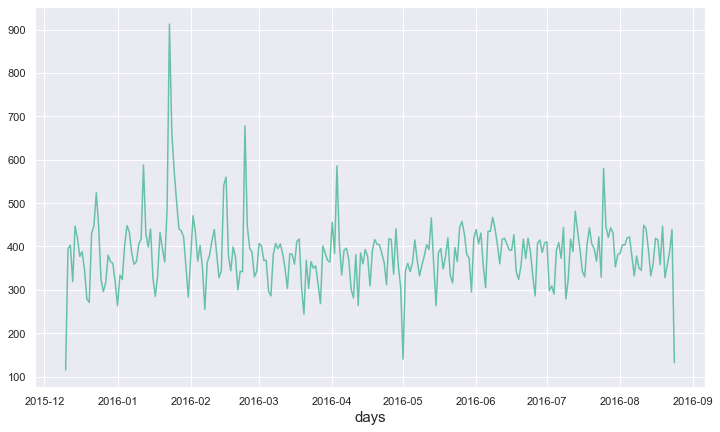

In [1195]:
calls_lineplot_days_df = calls_lineplot_df.pivot_table(index=DAYS, values=C, aggfunc="count")
sns.lineplot(x=calls_lineplot_days_df.index, y=calls_lineplot_days_df.to_numpy()[:, 0]);

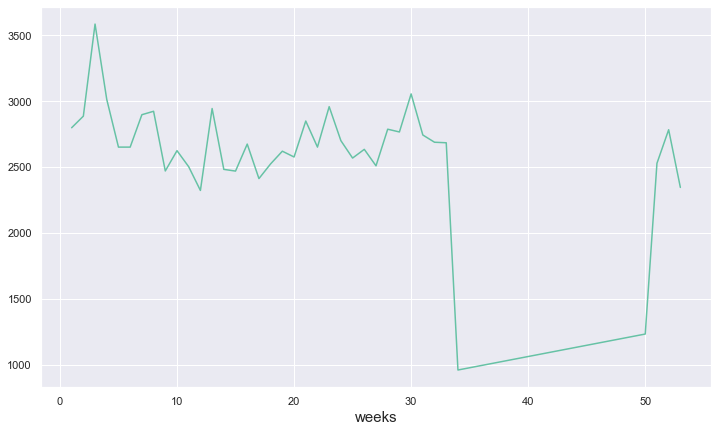

In [1196]:
calls_lineplot_weeks_df = calls_lineplot_df.pivot_table(index=WEEKS, values=C, aggfunc="count")
sns.lineplot(x=calls_lineplot_weeks_df.index, y=calls_lineplot_weeks_df.to_numpy()[:, 0]);

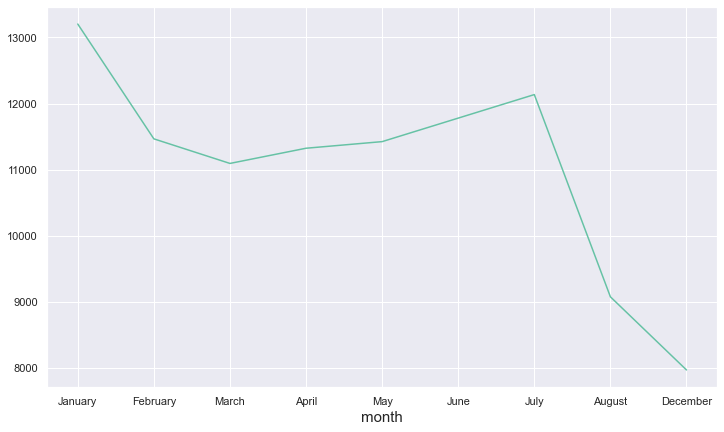

In [1197]:
calls_lineplot_weeks_df = df.pivot_table(index=MONTH, values=C, aggfunc="count")
sns.lineplot(x=calls_lineplot_weeks_df.index, y=calls_lineplot_weeks_df.to_numpy()[:, 0]);

## 911-Calls by Town

### Which Towns got the most 911-Calls

LOWER MERION      8444
ABINGTON          5977
NORRISTOWN        5892
UPPER MERION      5228
CHELTENHAM        4575
POTTSTOWN         4147
UPPER MORELAND    3437
Name: town, dtype: int64

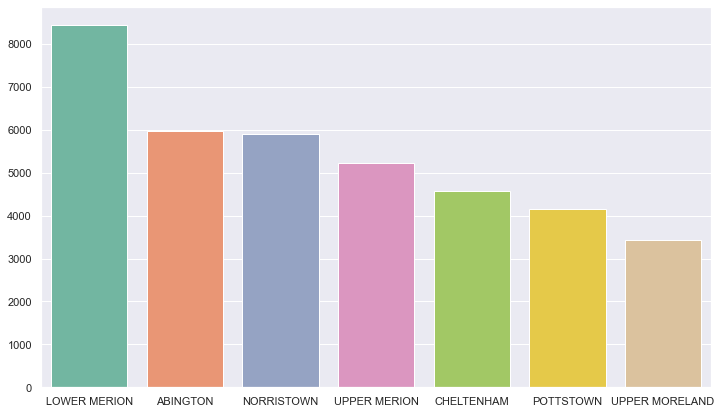

In [1109]:
top_7_911_call_towns = df[TOWN].value_counts().head(7)
top_7_towns = top_7_911_call_towns.index

sns.barplot(x=top_7_towns, y=top_7_911_call_towns.to_numpy())
top_7_911_call_towns

In [ ]:
top_town_filter = df[TOWN].isin(top_7_towns)

### What are the most 911-Emergency-Calls in the Top-911-Call-Towns

<AxesSubplot:xlabel='emergencyType', ylabel='count'>

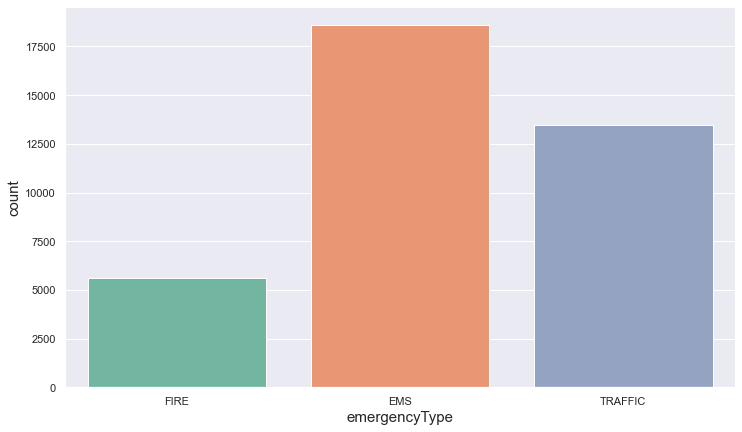

In [1123]:
sns.countplot(x=EMERGENCY_TYPE, data=df[top_town_filter])

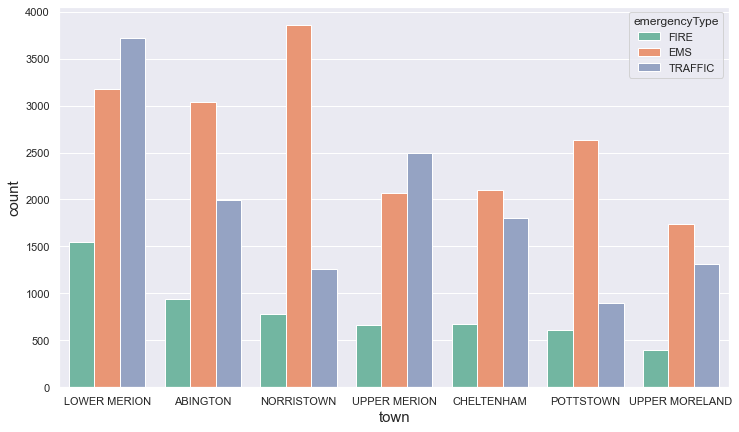

In [1110]:
sns.countplot(x=TOWN, hue=EMERGENCY_TYPE, data=df[top_town_filter], order=top_7_towns);

### Are there different Patterns between the Towns and the freqency of 911-Calls at the HourOfDay

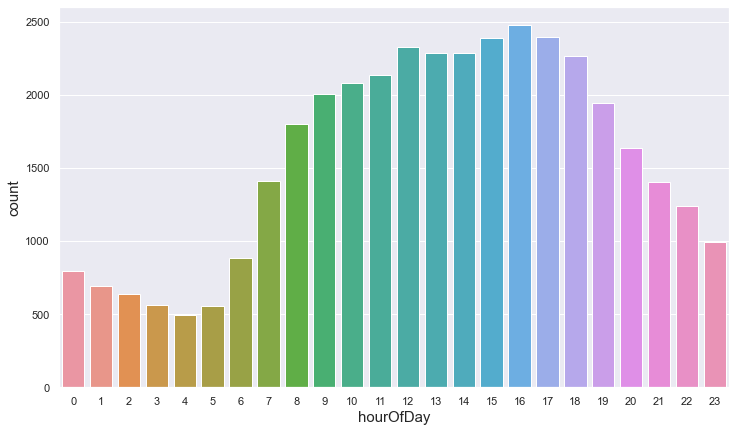

In [1111]:
sns.countplot(x=HOUR_OF_DAY, data=df[top_town_filter]);

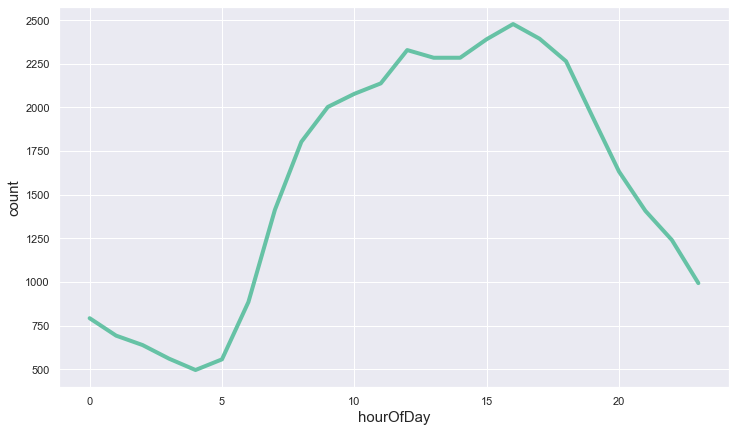

In [1112]:
calls_per_hour_df = df[top_town_filter].pivot_table(index=HOUR_OF_DAY, values=C, aggfunc="count")
sns.lineplot(x=HOUR_OF_DAY, y=C, data=calls_per_hour_df, linewidth=4);

[(0.0, 600.0)]

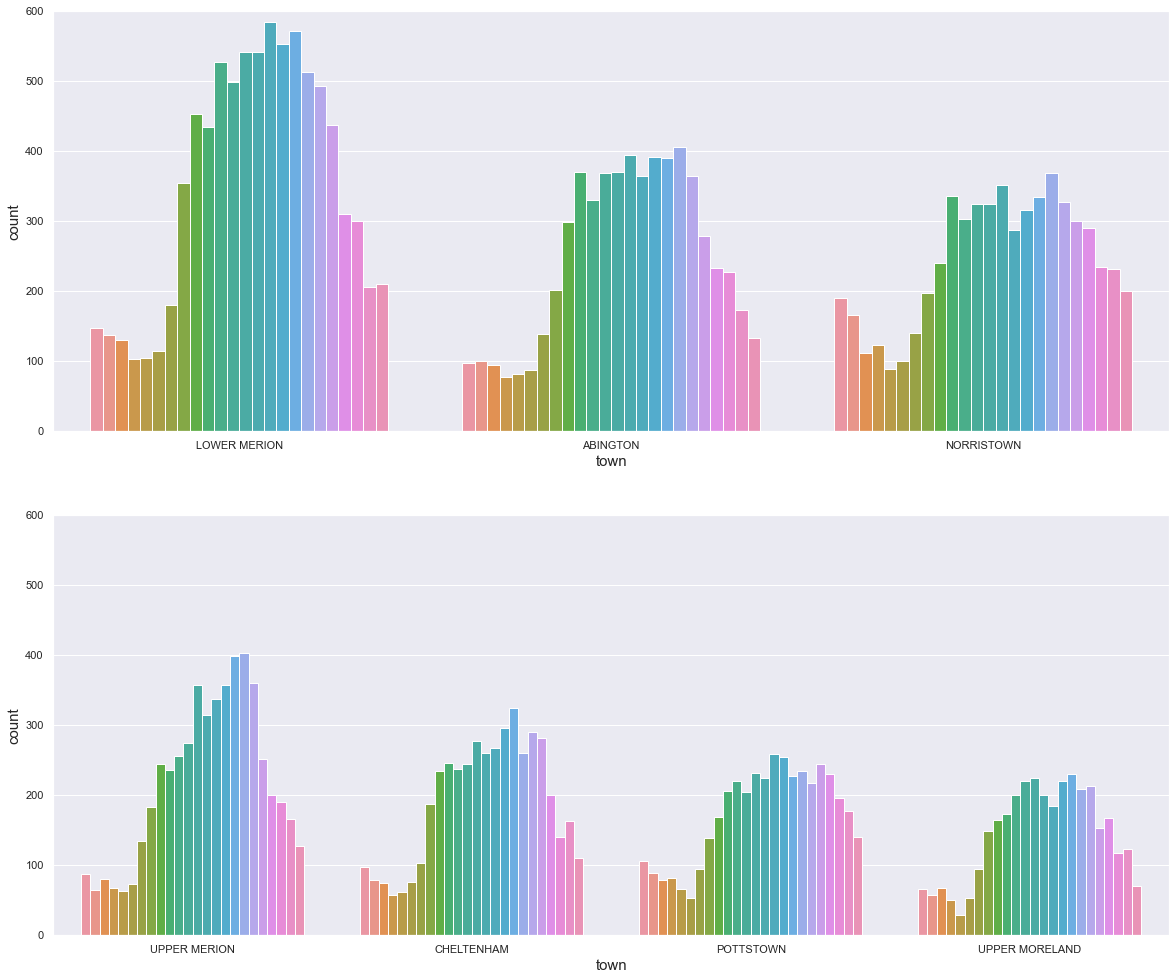

In [1113]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 17))
ax1, ax2 = axes

g1 = sns.countplot(x=TOWN, hue=HOUR_OF_DAY, data=df[top_town_filter], order=top_7_towns[:3], ax=ax1)
g2 = sns.countplot(x=TOWN, hue=HOUR_OF_DAY, data=df[top_town_filter], order=top_7_towns[3:], ax=ax2)

g1.legend().remove();
g2.legend().remove();

g1.set(ylim=(0, 600))
g2.set(ylim=(0, 600))

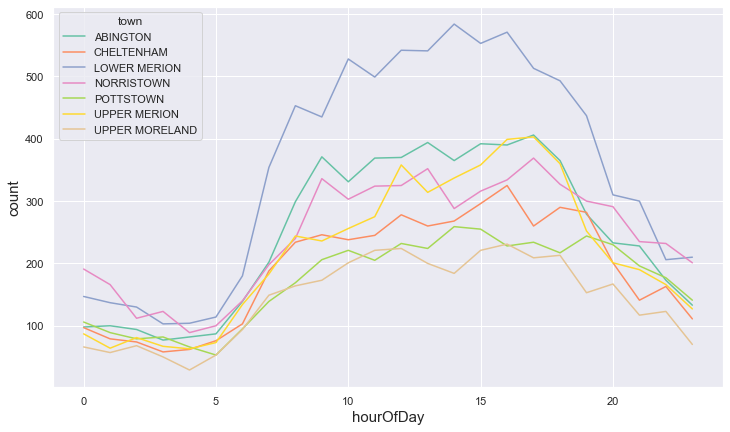

In [1114]:
calls_per_hour_by_town_df = df[top_town_filter].pivot_table(index=[HOUR_OF_DAY, TOWN], values=C, aggfunc="count").reset_index()
sns.lineplot(x=HOUR_OF_DAY, y=C, hue=TOWN, data=calls_per_hour_by_town_df);

### Are there different Patterns between the Towns and the freqency of 911-Calls at the DayOfWeek days

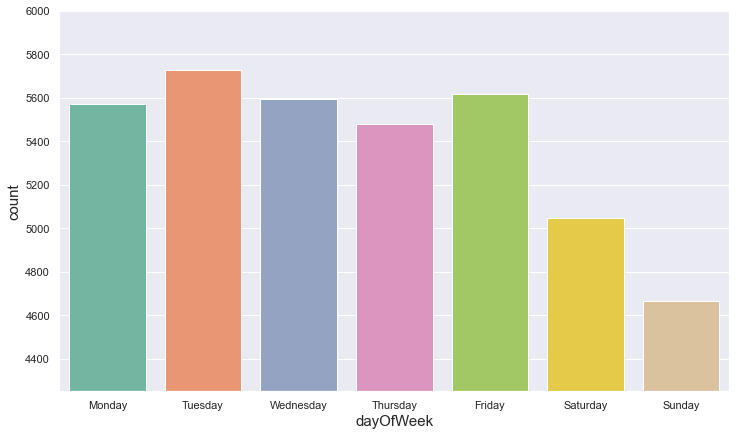

In [1118]:
sns.countplot(x=DAY_OF_WEEK, data=df[top_town_filter]).set(ylim=(4250, 6000));

In [715]:
df[MONTH].value_counts()

January     13203
July        12135
June        11779
February    11465
May         11423
April       11323
March       11093
August       9074
December     7967
Name: month, dtype: int64

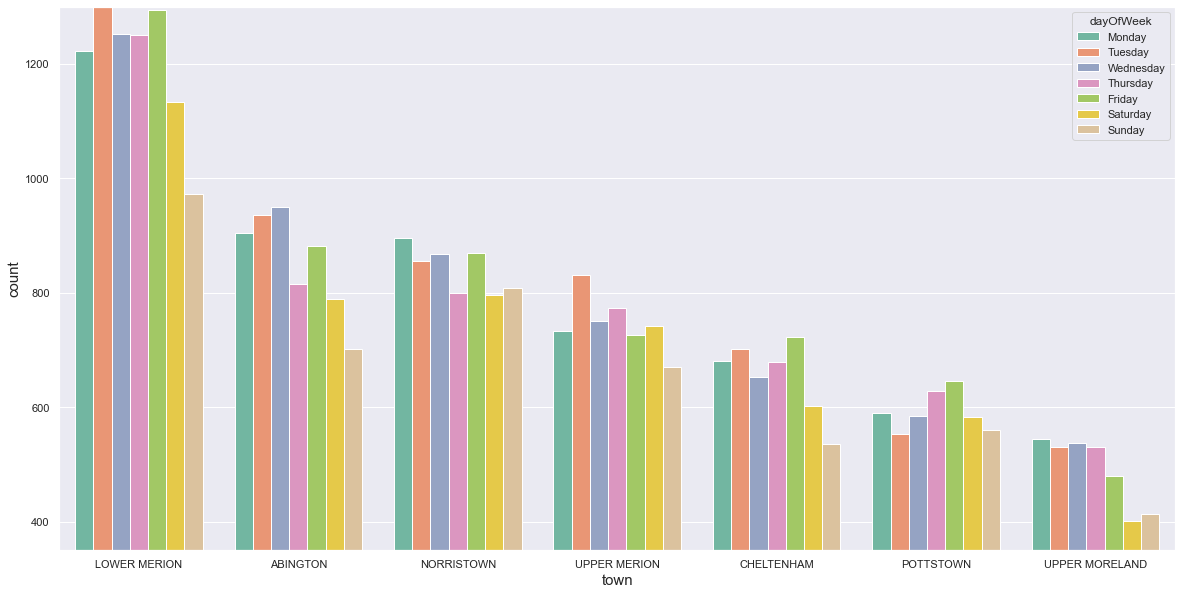

In [1117]:
plt.figure(figsize=(20, 10))
sns.countplot(x=TOWN, hue=DAY_OF_WEEK, data=df[top_town_filter], order=top_7_towns).set(ylim=(350, 1300));

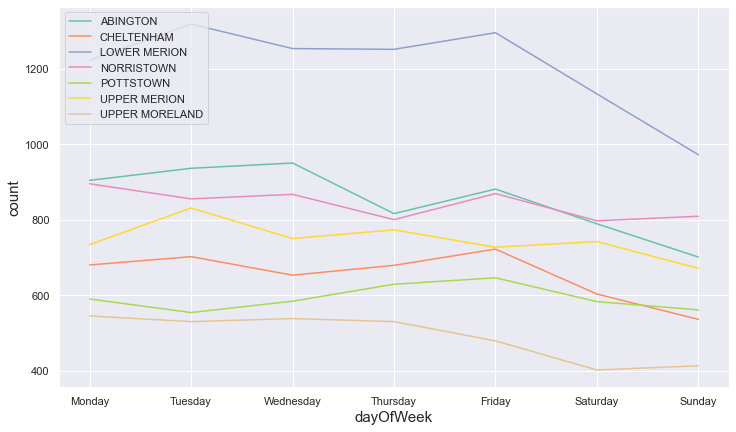

In [1116]:
calls_per_week_day_by_town_df = df[top_town_filter].pivot_table(index=[DAY_OF_WEEK, TOWN], values=C, aggfunc="count").reset_index().sort_values(by=DAY_OF_WEEK)
sns.lineplot(x=DAY_OF_WEEK, y=C, hue=TOWN, data=calls_per_week_day_by_town_df)
plt.legend(loc='upper left');

### Are there different Patterns between the Towns and the freqency of 911-Calls at the Months

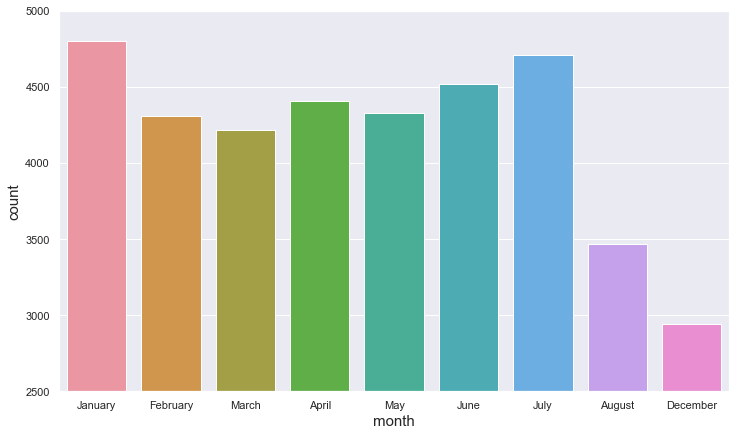

In [1119]:
sns.countplot(x=MONTH, data=df[top_town_filter]).set(ylim=(2500, 5000));

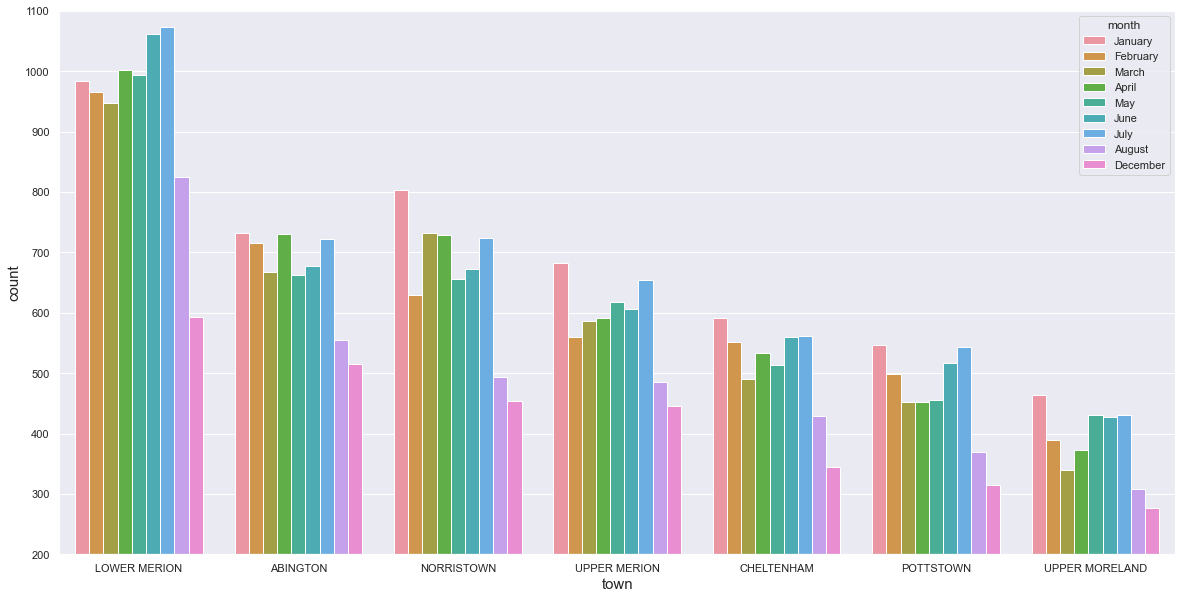

In [1120]:
plt.figure(figsize=(20, 10))
sns.countplot(x=TOWN, hue=MONTH, data=df[top_town_filter], order=top_7_towns).set(ylim=(200, 1100));

In [853]:
calls_per_month_by_town_df = df[top_town_filter].pivot_table(index=[MONTH, TOWN], values=C, aggfunc="count").reset_index().sort_values(by=MONTH)
calls_per_month_by_town_df

,month,town,count
0,April,ABINGTON,730
1,April,CHELTENHAM,533
2,April,LOWER MERION,1002
3,April,NORRISTOWN,728
4,April,POTTSTOWN,452
...,...,...,...
57,May,CHELTENHAM,513
58,May,LOWER MERION,993
59,May,NORRISTOWN,655
60,May,POTTSTOWN,455


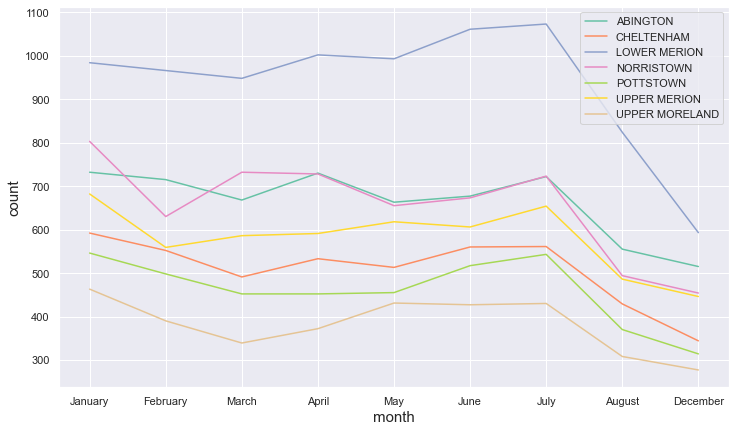

In [1121]:
calls_per_month_by_town_df = df[top_town_filter].pivot_table(index=[MONTH, TOWN], values=C, aggfunc="count").reset_index().sort_values(by=MONTH)
sns.lineplot(x=MONTH, y=C, hue=TOWN, data=calls_per_month_by_town_df)
plt.legend(loc='upper right');

## EmergencyTypes of 911-Calls

### How is the distribution of Emergency-Types

### In which Towns are the most EMS-911-Calls

### In which Towns are the most Fire-911-Calls

### In which Towns are the most Traffic-911-Calls

## Addresses of 911-Calls

### Which Addresses did the most 911-Calls

### How is the distribution of the Top-Addresses EmergencyTypes

### Which Address got the most EMS-911-Calls

### Which Address got the most Fire-911-Calls

### Which Address got the most Traffic-911-Calls

# Conclusion